In [1]:
# CS273A, Winter 2022, Final Project 
# Fashion MNIST using MLtools

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# import data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [2]:
print("Train images, labels shapes = ", train_images.shape, train_labels.shape)
print("Test  images, labels shapes = ", test_images.shape, test_labels.shape)

Train images, labels shapes =  (60000, 28, 28) (60000,)
Test  images, labels shapes =  (10000, 28, 28) (10000,)


In [3]:
# Split the data
Xtr, Ytr = train_images[0:50000,:,:], train_labels[0:50000]
Xva, Yva = train_images[50001:60000,:,:], train_labels[50001:60000]

# flatten the arrays 
Xtr = Xtr.reshape(Xtr.shape[0], Xtr.shape[1]*Xtr.shape[2])
Xva = Xva.reshape(Xva.shape[0], Xva.shape[1]*Xva.shape[2])

# Rescale values from 0-255 to 0-1
Xtr = Xtr/255.0
Xva = Xva/255.0

Trained label name =  Sneaker


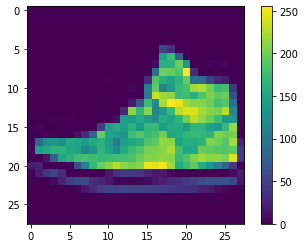

In [4]:
# Plot image
i = 785
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Trained label name = ", class_names[train_labels[i]])

In [52]:
# knn classifier
import mltools as ml
from timeit import timeit

# knn
size = 10000
sizeTest = 1000
Xs, Ys = Xtr[0:size,:], Ytr[0:size]
Xv, Yv = Xtr[size+1:size+sizeTest,:], Ytr[size+1:size+sizeTest]

K = [5,10,20,50,100] #
A = [0,1,2,4] #

Ypred = np.zeros((len(K), len(A)))
err = np.zeros((len(K), len(A)))
errCount = np.zeros((len(K), len(A)))
errRate = np.zeros((len(K), len(A)))
pctCor = np.zeros((len(K), len(A)))

print("kNN classifier, training & test sizes for Fashion MNIST = ", size, sizeTest)

for i,k in enumerate(K):
    for j,alpha in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(Xs, Ys, k, alpha)
        %time Ypred = learner.predict(Xv)         
        
        err = np.abs(Yv - Ypred)
        errCount[i][j] = np.count_nonzero(err != 0)
        errRate[i][j] = errCount[i][j]/sizeTest
        pctCor[i][j] = (1-errRate[i][j])*100
        
        print("kNN, alpha, error count, Accuracy % = ", k, alpha, errCount[i][j], pctCor[i][j])


kNN classifier, training & test sizes for Fashion MNIST =  10000 1000
Wall time: 5min 39s
kNN, alpha, error count, Accuracy % =  5 0 156.0 84.39999999999999
Wall time: 5min 37s
kNN, alpha, error count, Accuracy % =  5 1 179.0 82.1
Wall time: 6min 3s
kNN, alpha, error count, Accuracy % =  5 2 183.0 81.69999999999999
Wall time: 5min 41s
kNN, alpha, error count, Accuracy % =  5 4 186.0 81.4
Wall time: 5min 52s
kNN, alpha, error count, Accuracy % =  10 0 150.0 85.0
Wall time: 5min 52s
kNN, alpha, error count, Accuracy % =  10 1 179.0 82.1
Wall time: 5min 54s
kNN, alpha, error count, Accuracy % =  10 2 181.0 81.89999999999999
Wall time: 6min 24s
kNN, alpha, error count, Accuracy % =  10 4 186.0 81.4
Wall time: 5min 50s
kNN, alpha, error count, Accuracy % =  20 0 170.0 83.0
Wall time: 5min 36s
kNN, alpha, error count, Accuracy % =  20 1 179.0 82.1
Wall time: 5min 42s
kNN, alpha, error count, Accuracy % =  20 2 181.0 81.89999999999999
Wall time: 6min 21s
kNN, alpha, error count, Accuracy % = 

In [68]:
# dec tree

size = 10000
sizeTest = 1000
Xs, Ys = Xtr[0:size,:], Ytr[0:size]
Xv, Yv = Xtr[size+1:size+sizeTest,:], Ytr[size+1:size+sizeTest]
np.random.seed

Depth = [5,10,20,50] #,10,20]
Parent = [2,5,10,20] #,5,10]

errCount = np.zeros((len(Depth), len(Parent)))
errRate = np.zeros((len(Depth), len(Parent)))
pctCor = np.zeros((len(Depth), len(Parent)))

print("Decision tree classifier, training & test sizes for Fashion MNIST = ", size, sizeTest)

for i,maxD in enumerate(Depth):
    for j,minP in enumerate(Parent):
        learner = ml.dtree.treeClassify(Xs, Ys, maxDepth = maxD, minParent = minP )         
        %time Ypred = learner.predict(Xv)         
        
        err = np.abs(Yv - Ypred)
        errCount[i][j] = np.count_nonzero(err != 0)
        errRate[i][j] = errCount[i][j]/sizeTest
        pctCor[i][j] = (1-errRate[i][j])*100
        
        print("maxDepth, minParent, error count, Accuracy % = ", maxD, minP, errCount[i][j], pctCor[i][j])


Decision tree classifier, training & test sizes for Fashion MNIST =  10000 1000
Wall time: 19 ms
maxDepth, minParent, error count, Accuracy % =  5 2 266.0 73.4
Wall time: 14 ms
maxDepth, minParent, error count, Accuracy % =  5 5 267.0 73.3
Wall time: 13 ms
maxDepth, minParent, error count, Accuracy % =  5 10 267.0 73.3
Wall time: 13 ms
maxDepth, minParent, error count, Accuracy % =  5 20 268.0 73.2
Wall time: 25 ms
maxDepth, minParent, error count, Accuracy % =  10 2 213.0 78.7
Wall time: 24 ms
maxDepth, minParent, error count, Accuracy % =  10 5 207.0 79.3
Wall time: 26 ms
maxDepth, minParent, error count, Accuracy % =  10 10 206.0 79.4
Wall time: 25 ms
maxDepth, minParent, error count, Accuracy % =  10 20 210.0 79.0
Wall time: 38 ms
maxDepth, minParent, error count, Accuracy % =  20 2 212.0 78.8
Wall time: 36 ms
maxDepth, minParent, error count, Accuracy % =  20 5 215.0 78.5
Wall time: 42 ms
maxDepth, minParent, error count, Accuracy % =  20 10 216.0 78.4
Wall time: 29 ms
maxDepth, m

In [70]:
# neural net
size = 20000
sizeTest = 1500
Xs, Ys = Xtr[0:size,:], Ytr[0:size]
Xv, Yv = Xtr[size+1:size+sizeTest,:], Ytr[size+1:size+sizeTest]
np.random.seed

activation = 'htangent'

nNodes = 500 #
nLayers = 10

print("Neural net classifier, htangent activation, training & test sizes for Fashion MNIST = ", size, sizeTest)


nn = ml.nnet.nnetClassify()
nn.init_weights([Xs.shape[1], nNodes*nLayers, 10], 'random', Xs, Ys)  
nn.train(Xs, Ys, stopTol=1e-8, initStep=.1, stepConstant=100, stopIter=1000)  
Ypred = learner.predict(Xv)       
err = np.abs(Yv - Ypred)
errCount = np.count_nonzero(err != 0)
errRate = errCount/sizeTest
pctCor = (1-errRate)*100

print("Nodes, Layers, error count, Accuracy % = ", nNodes, nLayers, errCount, pctCor)

Neural net classifier, htangent activation, training & test sizes for Fashion MNIST =  20000 1500
it 2 : Jsur = 2.287208807773226, J01 = 0.8984
it 4 : Jsur = 1.9014342003163136, J01 = 0.89945
it 8 : Jsur = 1.2916323687435047, J01 = 0.90325
it 16 : Jsur = 1.1126572608668177, J01 = 0.8966
it 32 : Jsur = 0.9496899228964567, J01 = 0.9013
it 64 : Jsur = 0.9274503759639267, J01 = 0.79225
it 128 : Jsur = 0.853450411042459, J01 = 0.73775
it 256 : Jsur = 0.7636643217176922, J01 = 0.65265
it 512 : Jsur = 0.6516538534501581, J01 = 0.43315
it 1024 : Jsur = 0.5792960608733092, J01 = 0.36845
Nodes, Layers, error count, Accuracy % =  500 10 317 78.86666666666666


In [12]:
# knn classifier with optimal performance values of k = 10, alpha = 0
import mltools as ml
from timeit import timeit

# knn
size = 10000
sizeTest = 1000
Xs, Ys = Xtr[0:size,:], Ytr[0:size]
Xv, Yv = Xtr[size+1:size+sizeTest,:], Ytr[size+1:size+sizeTest]

k = 10 #
alpha = 0 #
 
print("kNN classifier, training & test sizes for Fashion MNIST = ", size, sizeTest)
 
learner = ml.knn.knnClassify()
learner.train(Xs, Ys, k, alpha)
Ytrain = learner.predict(Xs)
Yval   = learner.predict(Xv)
 

errTrain = np.abs(Ys - Ytrain)
errVal   = np.abs(Yv - Yval)

errCountTrain = np.count_nonzero(errTrain != 0)
errCountVal   = np.count_nonzero(errVal != 0)

errRateTrain = errCountTrain/size
errRateVal   = errCountVal/sizeTest


pctCorTrain = (1-errRateTrain)*100
pctCorVal   = (1-errRateVal)*100


print("kNN, alpha, Training Accuracy %, Val Accuracy % = ", k, alpha, pctCorTrain, pctCorVal)

kNN classifier, training & test sizes for Fashion MNIST =  10000 1000
kNN, alpha, Training Accuracy %, Val Accuracy % =  10 0 85.22000000000001 85.0
